# Principal Component Analysis (PCA)

In this exercise, we will use the same dataset as for the linear regression calculation. 

Recall that based on the correlation matrix, we selected the variables RM, LSTAT and the explanatory variable MEDV in the model.

The developed model had an R2 score of approximately 0.65 on the training and test data.

Using PCA, we will try to achieve a better result, i.e. to create a model that will predict better.

## Data loading and analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv ("..\\dataset\\HousingData.csv")

In [3]:
data=data.dropna()

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The scales of the variables are very different from each other, so we will have to rescale our data to improve its quality because we cannot apply PCA or linear regression to these data.

## Linear model of all variables without adjustments
Create a control linear model with all variables. 

The goal is to have a sample model to compare with the refinements.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

We divide the data into training and testing

In [7]:
X = np.array(data.drop('MEDV',axis=1))
Y = np.array(data['MEDV'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Creating a linear model

In [8]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Validation of the model on test data

In [9]:
Y_pred = lr.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.8096509105526151
RMSE: 4.759028085429046


Validation of the model on training data

In [10]:
Y_pred = lr.predict(X_train)
r2 = r2_score(Y_train, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.7415404358914824
RMSE: 4.358171447983058


## Correlation
Again we perform a correlation analysis and look for linear dependencies between the variables.

<Axes: >

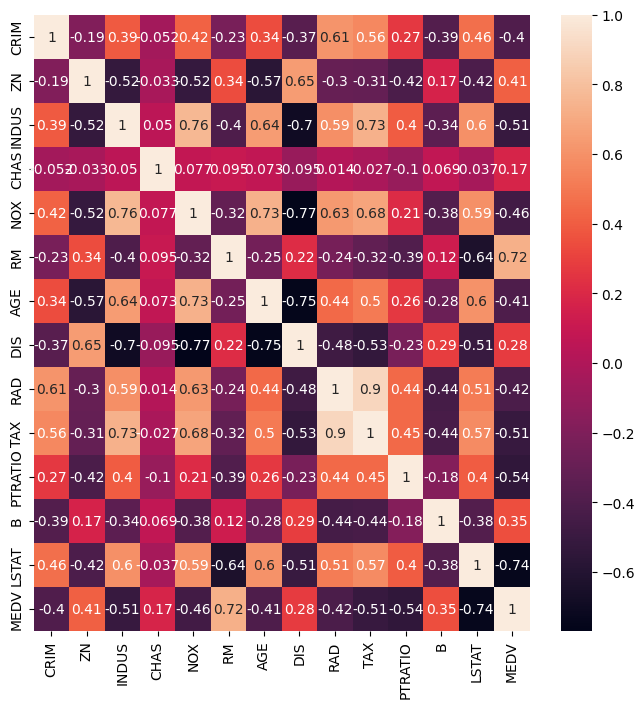

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.heatmap(data.corr(),annot=True)

The **correlation matrix** contains Pearson correlation coefficients between all pairs of variables. The values range from -1 to 1.
* 1 → strong positive linear correlation
* -1 → strong negative linear correlation
* 0 → no linear correlation

**Multicollinearity** occurs when predictor variables are strongly correlated with each other (e.g. DIS with INUDS, INOX, AGE).

Problem:
* Estimates of regression coefficients are unstable and sensitive to small changes in the data.
* Interpretation of individual coefficients becomes meaningless because it is impossible to isolate the effect of one variable while holding the others fixed if they are correlated with each other.
* Increases the standard error of the coefficients, which reduces statistical significance.


The last row is important, as it shows us the linear correlation between the explanatory variables and the explained variable MEDV. Our target variable seems to be highly correlated with LSTAT and RM, which makes sense since these two factors are very important for house pricing.  There is also a lot of multicollinearity.

The usual interpretation of the regression coefficient is that it provides an estimate of the effect of a unit change in the independent variable on the dependent variable while holding the other variables constant. In the case of multicollinearity, however, we cannot say this. If X1 is strongly correlated with another independent variable, X2, in a given data set, then we have a set of observations for which X1 and X2 have some linear stochastic relationship. Thus, we cannot ensure when the variable X1 changes, X2 remains constant.


## Variance Inflation Factor (VIF) 

The **VIF** detects multicollinearity in regression analysis. 

Its presence can negatively affect the regression results. The VIF estimates how much the variance of the regression coefficient is inflated due to multicollinearity in the model.

VIF=1/(1-R^2)

Where R^2 is the coefficient of determination. 

Simply put, it is the proportion of the variance of the independent variable that is explained by the dependent variable. 

So we run a linear regression using each variable as the target and the others as predictors and calculate R^2 and then calculate VIF for them.

If VIF < 4, the variable can be used, otherwise we have to find a way to remove the collinearity of these variables.

In [12]:
vifdf = []
for i in data.columns:
    X = np.array(data.drop(i,axis=1))
    y = np.array(data[i])
    lr = LinearRegression()
    lr.fit(X,y)
    y_pred = lr.predict(X)
    r2 = r2_score(y,y_pred)
    vif = 1/(1-r2)
    vifdf.append((i,vif))

vifdf = pd.DataFrame(vifdf,columns=['Features','Variance Inflation Factor'])
vifdf.sort_values(by='Variance Inflation Factor')

,Features,Variance Inflation Factor
3,CHAS,1.094393
11,B,1.410486
0,CRIM,1.782836
10,PTRATIO,2.012261
1,ZN,2.392337
5,RM,2.566120
6,AGE,3.180587
12,LSTAT,3.648790
2,INDUS,4.051952
13,MEDV,4.293964


We see that almost half of the variables have a VIF value greater than or close to 4. TAX and RAD have a VIF almost twice as high as our threshold.

Thus, it will be appropriate to resolve multicollinearity. This can be done in several ways:
* Remove correlated variables → select only one of the pair of highly correlated variables.
* Principal Component Analysis (PCA) → transform the predictors into uncorrelated components.
* Regularization (Ridge, Lasso) → suppresses the effect of collinearity and stabilizes the model.

We will look at PCA.

## Data standardization
The first step is to standardize the data, so that all variables have a mean of around 0. Then their effect on the output variable will be similar.

Let's look at the data before standardization.

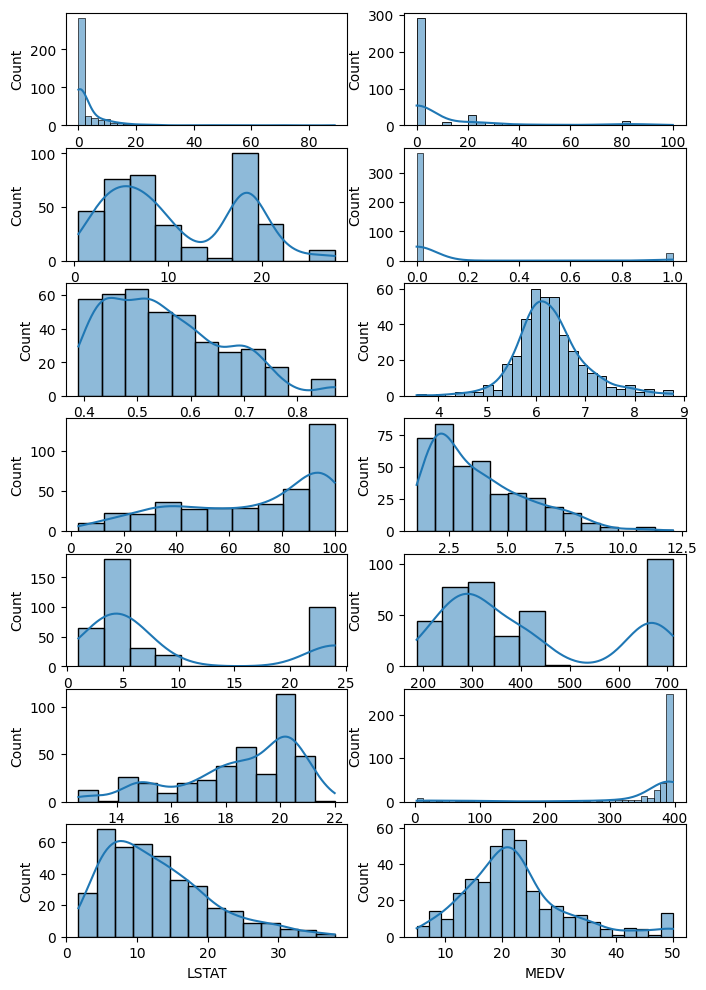

In [13]:
pos = 1
fig = plt.figure(figsize=(8, 12))
for i in data.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data[i],ax=ax, kde=True)

Perform z-standardization using the rescale function.

In [14]:
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

Create a new standardized dataset data_std.

In [15]:
data_std = pd.DataFrame(columns=data.columns)
for i in data.columns:
    data_std[i] = rescale(data[i])

To check, let's write down the basic statistics.

In [16]:
data_std.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,3.940000e+02,3.940000e+02,3.940000e+02,394.000000,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02
mean,-1.082045e-16,2.254260e-17,-1.803408e-17,0.000000,5.229883e-16,3.020708e-16,-1.713238e-16,-5.410224e-17,7.213632e-17,7.213632e-17,4.688861e-16,-5.410224e-17,-3.606816e-16,-1.442726e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.003094e-01,-4.784429e-01,-1.525812e+00,-0.270893,-1.451789e+00,-3.895522e+00,-2.367723e+00,-1.274995e+00,-9.733713e-01,-1.303715e+00,-2.740676e+00,-3.986087e+00,-1.510463e+00,-1.898686e+00
25%,-3.920904e-01,-4.784429e-01,-8.498196e-01,-0.270893,-8.859807e-01,-5.741747e-01,-8.411198e-01,-8.077725e-01,-6.258857e-01,-7.496860e-01,-5.250795e-01,2.040310e-01,-7.722741e-01,-6.080780e-01
50%,-3.717778e-01,-4.784429e-01,-3.533200e-01,-0.270893,-1.345164e-01,-1.124884e-01,3.143659e-01,-2.888003e-01,-5.100571e-01,-4.541048e-01,2.596109e-01,3.774397e-01,-2.010160e-01,-1.432405e-01
75%,-2.761921e-02,4.338885e-02,1.027615e+00,-0.270893,6.257887e-01,4.663207e-01,9.077961e-01,6.249166e-01,1.690685e+00,1.542183e+00,7.673517e-01,4.301931e-01,5.949825e-01,2.887850e-01
max,9.267784e+00,3.696211e+00,2.423025e+00,3.682132,2.809455e+00,3.581718e+00,1.113973e+00,3.965189e+00,1.690685e+00,1.809543e+00,1.598200e+00,4.301931e-01,3.448194e+00,3.023124e+00


Display the distribution of values with an estimate of the distribution function.

The shape of the distribution of the new variables is the same as for the original variables. Only their mean value is now 0.

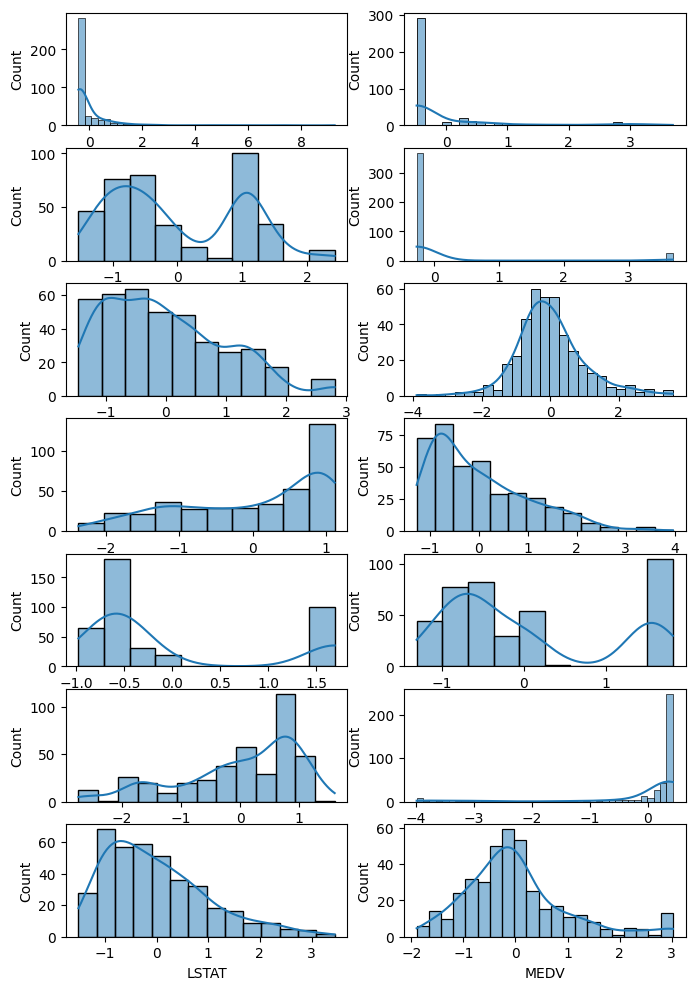

In [17]:
pos = 1
fig = plt.figure(figsize=(8,12))
for i in data_std.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data_std[i],ax=ax, kde=True)

Let's look at the correlation of the standardized data. It remains the same.

<Axes: >

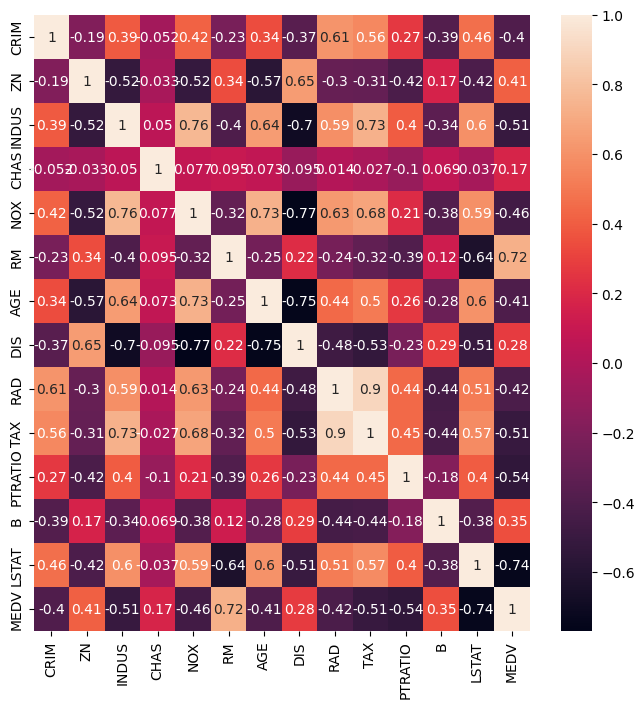

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.heatmap(data_std.corr(),annot=True)

## PCA

### Idea
* If we have a lot of correlated variables, there is hidden redundancy in the data.
* PCA removes this redundancy by converting the original variables to new, uncorrelated variables = principal components.
* These components are linear combinations of the original variables.


### How PCA works (intuition)
* Finds the direction with the largest variance of the data (1st principal component).
* Finds a second direction with the largest variance but orthogonal to the first (2nd principal component).
* Continues until all dimensions are exhausted.
* Result:
    * Principal components are uncorrelated.
    * The first components explain most of the variability in the data.

### What PCA is used for
* Removing multicollinearity → components are orthogonal → no collinearity.
* Dimensionality reduction → keep only the first few components that explain e.g. 90-95% of the variability.
* Visualization → complex data from many variables can be plotted in 2D/3D space.

PCA is sensitive to the scale of the variables. Therefore, standardization is usually done before applying PCA.

We will not write PCA by hand, but use its implementation from the library.


In [19]:
from sklearn.decomposition import PCA

The number of PCA components will be 13 as well as input parameters.

We have to remove the output MEDV from the input to the PCA.

In [20]:
pca = PCA(n_components=13)
X = data_std.drop('MEDV',axis=1)
X_pca = pca.fit_transform(X)

Now we will create a new data with principal components as input variables and MEDV as output variable.

In [21]:
data_std_pca = pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13'])
data_std_pca['MEDV'] = data_std['MEDV']

PCA was intended to reduce multicollinearity. Let's check it out.

<Axes: >

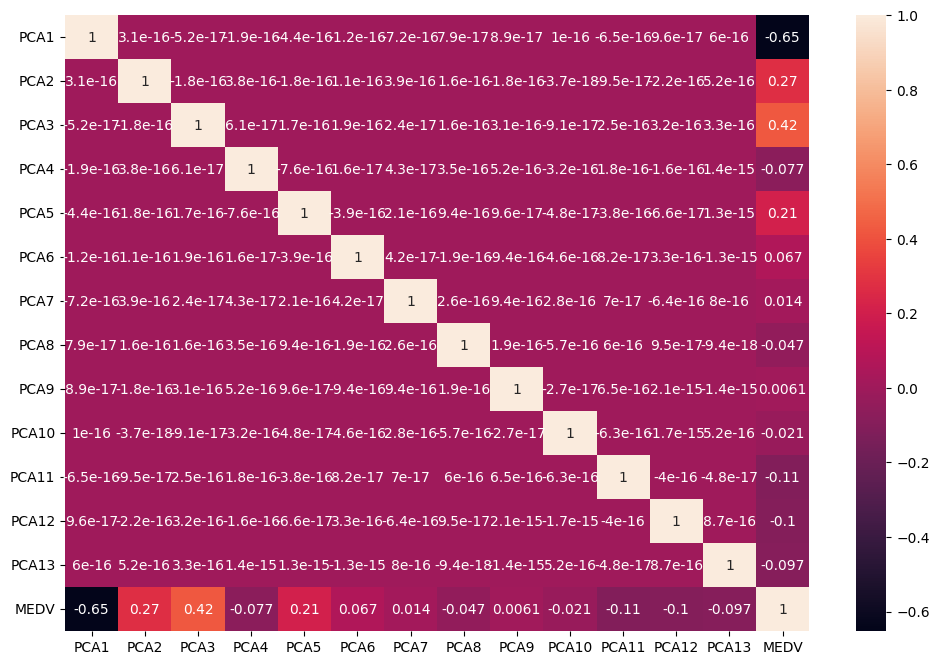

In [22]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sns.heatmap(data_std_pca.corr(),annot=True)

The correlation matrix shows that the PCA components are not dependent on each other.

MEDV is linearly dependent on the first 3 PCA variables. Then the linear dependence decreases greatly.

The distribution functions of the PCA variables are different from the original ones.

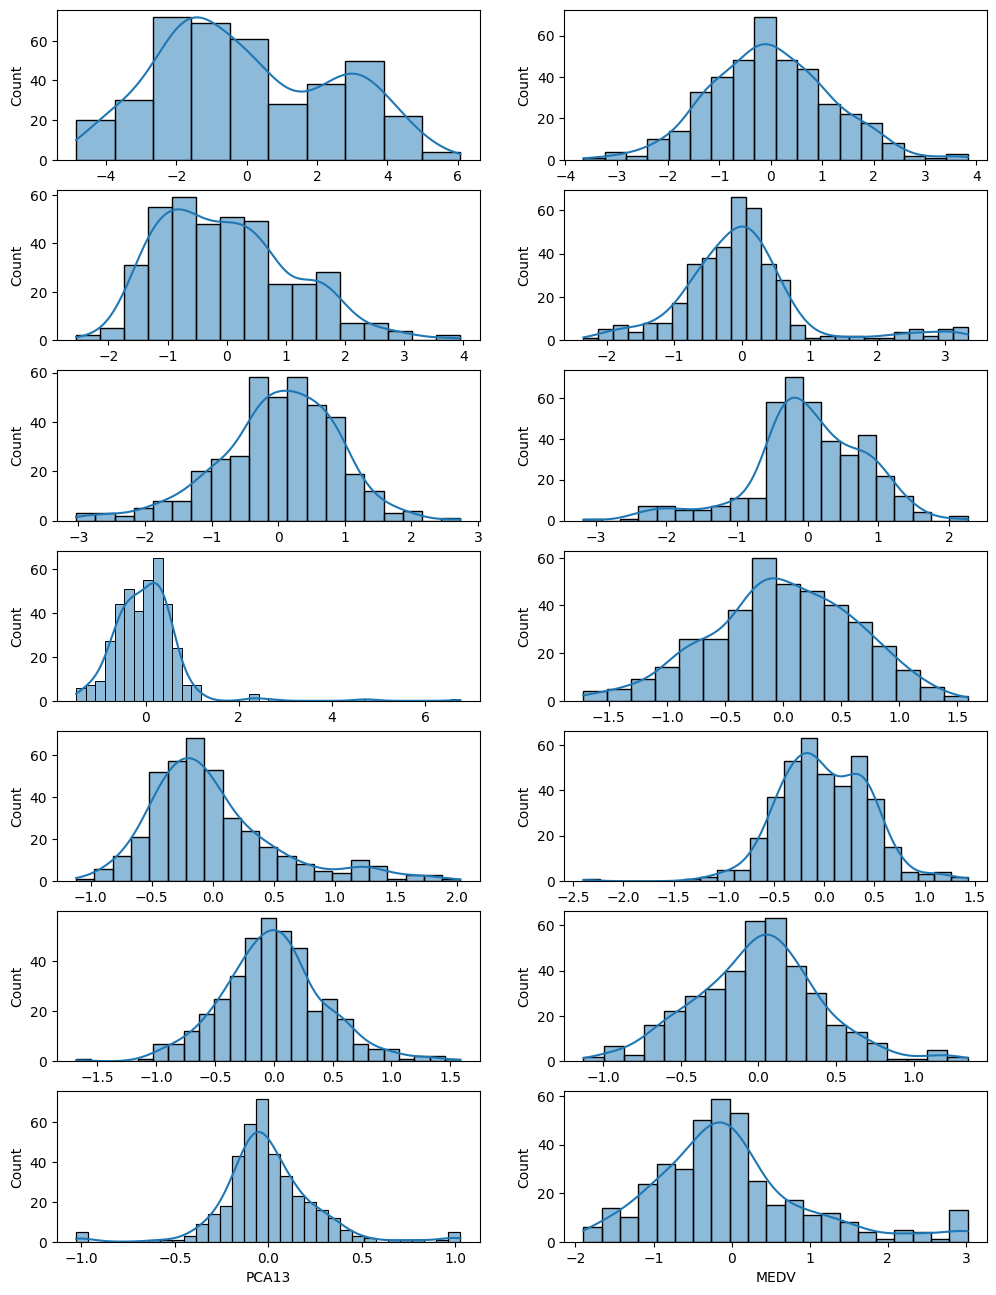

In [23]:
pos = 1
fig = plt.figure(figsize=(12,16))
for i in data_std_pca.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data_std_pca[i],ax=ax, kde=True)

## Linear model of all PCA variables 
We again divide the data into training and test data.

In [24]:
X = np.array(data_std_pca.drop('MEDV',axis=1))
Y = np.array(data_std_pca['MEDV'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

We create a linear model.

In [25]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Model validation for training data

In [26]:
Y_pred = lr.predict(X_train)
r2 = r2_score(Y_train, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.7735863059615091
RMSE: 0.4600695583903359


Model validation for test data

In [27]:
Y_pred = lr.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.7255828308575931
RMSE: 0.5829913884804581


The resulting model from the PCA variables is slightly better than the original linear model from the original variables.

## Linear model of 6 PCA variables
PCA can also be used for dimensionality reduction. 

So we create a model that has only 6 variables instead of 13 input variables.

In [28]:
lr = LinearRegression()
lr.fit(X_train[:,0:6], Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Model validation on training data.

In [29]:
Y_pred = lr.predict(X_train[:,0:6])
r2 = r2_score(Y_train, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.7238751278959685
RMSE: 0.5080715966602074


Model validation on test data

In [30]:
Y_pred = lr.predict(X_test[:,0:6])
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.7456540310032853
RMSE: 0.5612662516536787


As expected, the precision of the reduced model is slightly lower. On the other hand, the model is smaller.